In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df.head()

Saving matches.csv to matches.csv


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving matches.csv to matches (1).csv

In [3]:
df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while playing in Mumbai [Easy]

In [4]:
filter_1 = df['city']=='Mumbai' 
filter_2 = df['season'] >= 2010
filter_3 = df['season'] <= 2015
new_df = df[filter_1 & filter_2 & filter_3] # filtering the data according to requirment
new_df['player_of_match'].value_counts().head(1)## frequency count

KA Pollard    6
Name: player_of_match, dtype: int64

Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]

In [ ]:
filter_1 = df[df['win_by_runs']>50]
filter_1['winner'].value_counts().head(1)

Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

For example if team1->KKR and team2->CSK

The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

In [5]:
def comp(x,y):
  filter_x = df['team1']== x
  filter_x1 = df['team2'] == y
  filter_y = df['team2']== x
  filter_y1 = df['team1'] == y
  face_off = df[(filter_x & filter_x1)| (filter_y & filter_y1)]
  print("Total number of face off between the teams : ", face_off['winner'].value_counts()[0] +  face_off['winner'].value_counts()[1])
  print(face_off['winner'].value_counts())

In [6]:
comp('Mumbai Indians','Kolkata Knight Riders')

Total number of face off between the teams :  25
Mumbai Indians           19
Kolkata Knight Riders     6
Name: winner, dtype: int64


In [7]:
comp('Chennai Super Kings','Kolkata Knight Riders')

Total number of face off between the teams :  20
Chennai Super Kings      13
Kolkata Knight Riders     7
Name: winner, dtype: int64


In [ ]:
comp('Mumbai Indians','Chennai Super Kings')

Q4 : Plot a bar graph on win_by_wickets col. [Easy]

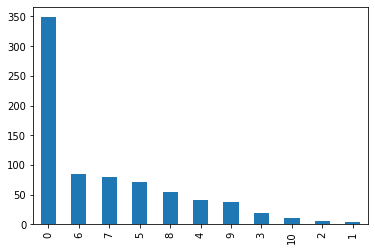

In [8]:
df['win_by_wickets'].value_counts().plot(kind = 'bar')
plt.show()